[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and ultralytics:

In [ ]:
!pip install -U torch sahi ultralytics

In [2]:
import os
os.getcwd()

- Import required modules:

In [33]:
# arrange an instance segmentation model for test
from sahi.utils.yolov8 import (
    OpenVino_yolov8s_model
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image
import time

- Download a yolov8 model and two test images:

In [32]:
# download YOLOV8S convert into OpenVino IR model
yolov8_model_path = "models/yolov8s.pt"
OpenVino_yolov8s_model(yolov8_model_path)

#OpenVino IR converted model path
yolov8_vino_model_path = "models/yolov8s_openvino_model/yolov8s.xml"

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv8 and YOLOv8 OpenVino IR Model

- Instantiate a detection model by defining model weight path and other parameters:

In [22]:
detection_vino_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8Vino',
    model_path=yolov8_vino_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

In [23]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [24]:
result_start_time = time.time()
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)
print(f"YOLOv8 model takes: {round((time.time()-result_start_time),5)} ms")

result_vino_start_time = time.time()
result_vino = get_prediction("demo_data/small-vehicles1.jpeg", detection_vino_model)
print(f"OpenVino IR YOLOv8 model takes: {round((time.time()-result_vino_start_time),5)} ms")

YOLOv8 model takes: 0.23927 ms
OpenVino IR YOLOv8 model takes: 0.20133 ms


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [25]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

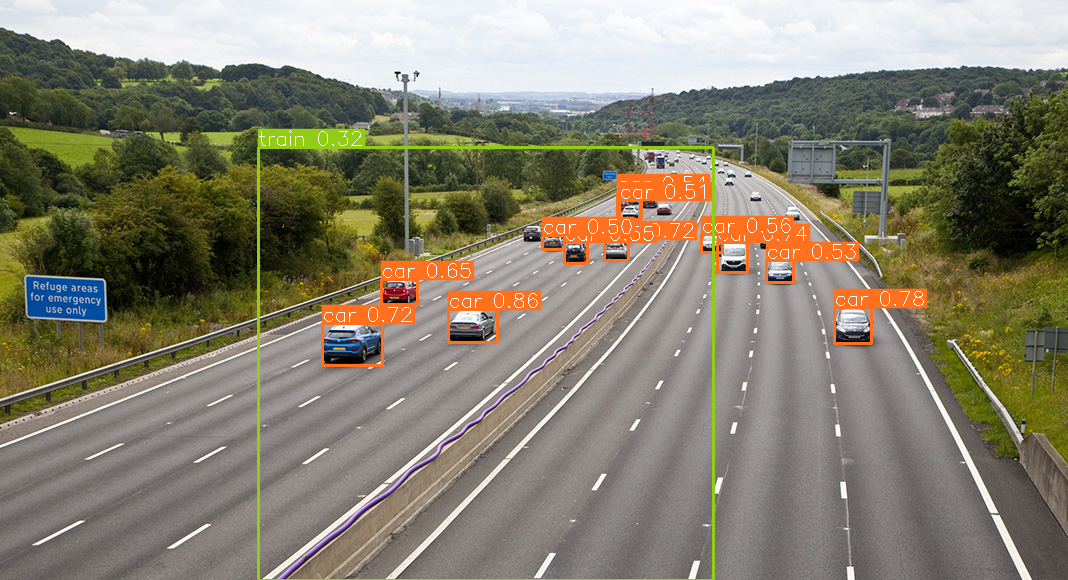

In [26]:
#model output without OpenVino
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

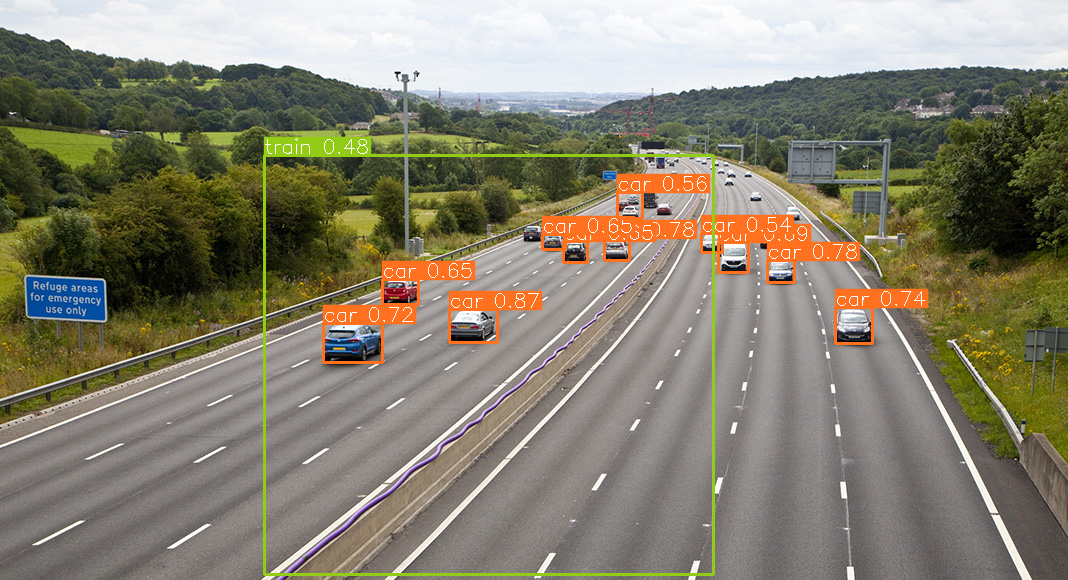

In [27]:
#model output with OpenVino
result_vino = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_vino_model)
result_vino.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")


## 2. Sliced Inference with a YOLOv8 and YOLOv8 OpenVino IR Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [28]:
result_start_time = time.time()
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)
print(f"YOLOv8 model takes: {round((time.time()-result_start_time),5)} ms\n")

Performing prediction on 15 number of slices.
YOLOv8 model takes: 1.95936 ms



- Visualize predicted bounding boxes and masks over the original image:

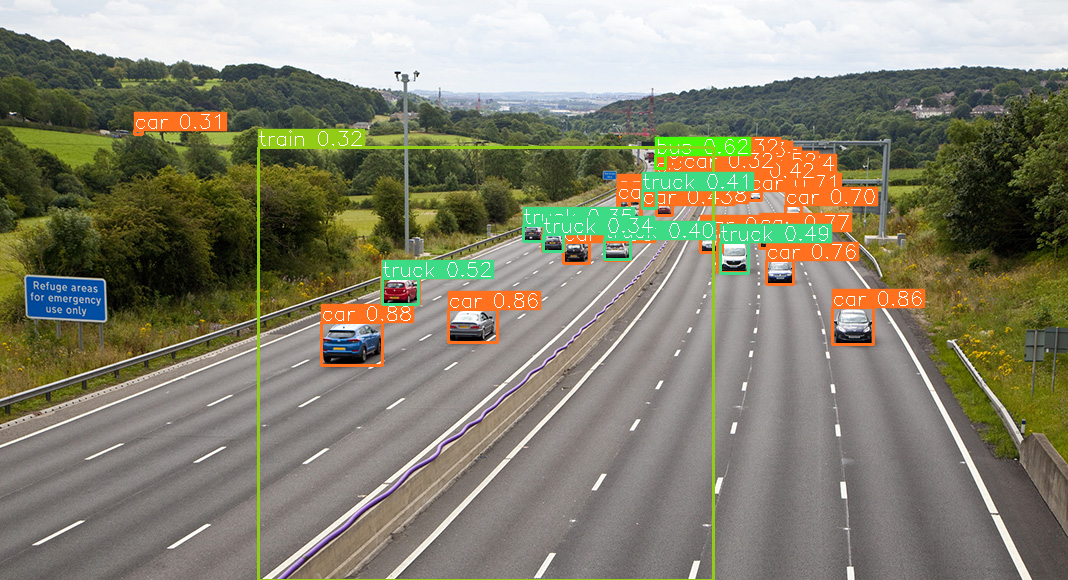

In [29]:
#model output without OpenVino
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [30]:
result_vino_start_time = time.time()
result_vino = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_vino_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)
print(f"OpenVino IR YOLOv8 model takes: {round((time.time()-result_vino_start_time),5)} ms")

Performing prediction on 15 number of slices.
OpenVino IR YOLOv8 model takes: 0.99725 ms


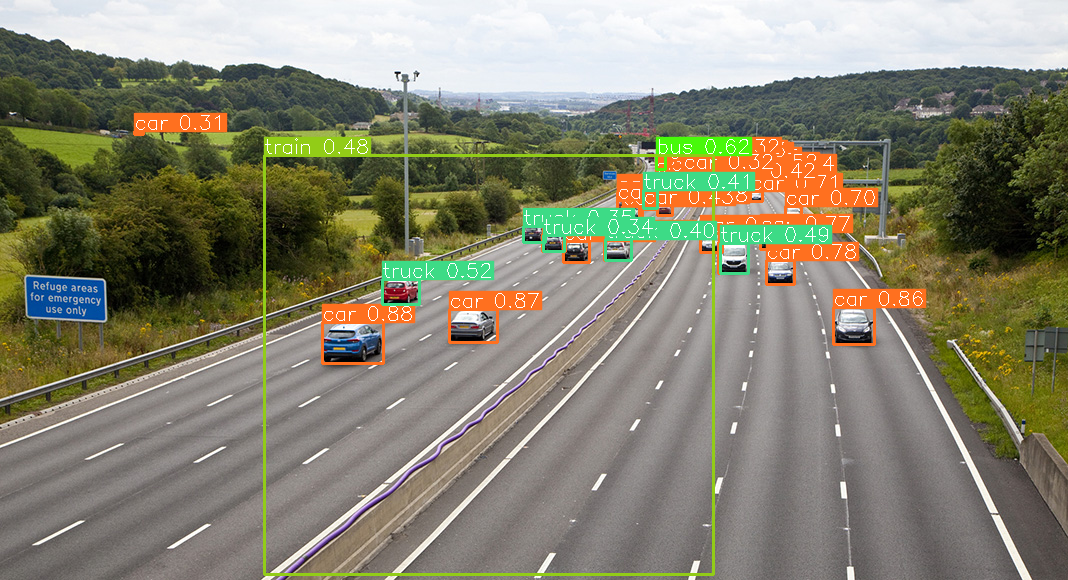

In [31]:
#model output with OpenVino
result_vino.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")